COVID-19 NOVEL CORONAVIRUS 

Data Import and Preprocessing:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
# Read data in the excel file
df = pd.read_csv('covid_19_data.csv')
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [3]:
df.shape


(306429, 8)

VISUALIZATIONS

In [4]:
print(df.isnull().sum())

SNo                    0
ObservationDate        0
Province/State     78100
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64


In [5]:
#list of countries affected covid-19
uniqueValues = df['Country/Region'].unique()
print('countries effected by Covid-19: %s' % len(uniqueValues)) 
print(uniqueValues);

countries effected by Covid-19: 229
['Mainland China' 'Hong Kong' 'Macau' 'Taiwan' 'US' 'Japan' 'Thailand'
 'South Korea' 'China' 'Kiribati' 'Singapore' 'Philippines' 'Malaysia'
 'Vietnam' 'Australia' 'Mexico' 'Brazil' 'Colombia' 'France' 'Nepal'
 'Canada' 'Cambodia' 'Sri Lanka' 'Ivory Coast' 'Germany' 'Finland'
 'United Arab Emirates' 'India' 'Italy' 'UK' 'Russia' 'Sweden' 'Spain'
 'Belgium' 'Others' 'Egypt' 'Iran' 'Israel' 'Lebanon' 'Iraq' 'Oman'
 'Afghanistan' 'Bahrain' 'Kuwait' 'Austria' 'Algeria' 'Croatia'
 'Switzerland' 'Pakistan' 'Georgia' 'Greece' 'North Macedonia' 'Norway'
 'Romania' 'Denmark' 'Estonia' 'Netherlands' 'San Marino' ' Azerbaijan'
 'Belarus' 'Iceland' 'Lithuania' 'New Zealand' 'Nigeria' 'North Ireland'
 'Ireland' 'Luxembourg' 'Monaco' 'Qatar' 'Ecuador' 'Azerbaijan'
 'Czech Republic' 'Armenia' 'Dominican Republic' 'Indonesia' 'Portugal'
 'Andorra' 'Latvia' 'Morocco' 'Saudi Arabia' 'Senegal' 'Argentina' 'Chile'
 'Jordan' 'Ukraine' 'Saint Barthelemy' 'Hungary' 'Faroe

In [6]:
df.columns

Index(['SNo', 'ObservationDate', 'Province/State', 'Country/Region',
       'Last Update', 'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')

In [7]:
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [8]:
df.tail()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
306424,306425,05/29/2021,Zaporizhia Oblast,Ukraine,2021-05-30 04:20:55,102641.0,2335.0,95289.0
306425,306426,05/29/2021,Zeeland,Netherlands,2021-05-30 04:20:55,29147.0,245.0,0.0
306426,306427,05/29/2021,Zhejiang,Mainland China,2021-05-30 04:20:55,1364.0,1.0,1324.0
306427,306428,05/29/2021,Zhytomyr Oblast,Ukraine,2021-05-30 04:20:55,87550.0,1738.0,83790.0
306428,306429,05/29/2021,Zuid-Holland,Netherlands,2021-05-30 04:20:55,391559.0,4252.0,0.0


In [9]:
#Formatting ObservationDate by converting to datetime object
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'], format='%m/%d/%Y', utc=True);

In [10]:
#First and last date of Observation in the Dataset
a = df.ObservationDate.value_counts().sort_index()
print('The first date is:',a.index[0])
print('The last date is:',a.index[-1])

The first date is: 2020-01-22 00:00:00+00:00
The last date is: 2021-05-29 00:00:00+00:00


In [11]:
# Get newest cases data i.e., cases count as of 2021-05-29 which is the last OBservationdate in dataset
data = df[df['ObservationDate'] == max(df['ObservationDate'])].reset_index()
data.head()

,index,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,305664,305665,2021-05-29 00:00:00+00:00,NaN,Afghanistan,2021-05-30 04:20:55,70111.0,2899.0,57281.0
1,305665,305666,2021-05-29 00:00:00+00:00,NaN,Albania,2021-05-30 04:20:55,132297.0,2449.0,129215.0
2,305666,305667,2021-05-29 00:00:00+00:00,NaN,Algeria,2021-05-30 04:20:55,128456.0,3460.0,89419.0
3,305667,305668,2021-05-29 00:00:00+00:00,NaN,Andorra,2021-05-30 04:20:55,13693.0,127.0,13416.0
4,305668,305669,2021-05-29 00:00:00+00:00,NaN,Angola,2021-05-30 04:20:55,34180.0,757.0,27646.0


In [12]:
#grouping by countries to find out latest cumulative confirmed no. of cases; sorting them in desc order
top_confirmed = data.groupby(by = 'Country/Region')['Confirmed'].sum().sort_values(ascending = False).head(20).reset_index()
top_confirmed

,Country/Region,Confirmed
0,US,33251939.0
1,India,27894800.0
2,Brazil,16471600.0
3,France,5719877.0
4,Turkey,5235978.0
5,Russia,4995613.0
6,UK,4496823.0
7,Italy,4213055.0
8,Argentina,3732263.0
9,Germany,3684672.0


In [13]:
#data1 obtains countries from top_confirmed dataframe where Confirmed is above 5000000
data1 = top_confirmed.loc[top_confirmed['Confirmed']>5000000]

Countries having more than 5000000 confirmed cases by 29th May 2021:

In [14]:
data1

,Country/Region,Confirmed
0,US,33251939.0
1,India,27894800.0
2,Brazil,16471600.0
3,France,5719877.0
4,Turkey,5235978.0


It is found that US, India, Brazil, France and Turkey are among countries with more than 5000000 confirmed cases by 29th May 2021.

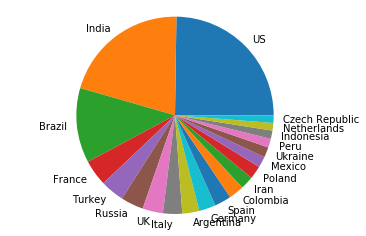

In [15]:
fig1, ax1 = plt.subplots()
ax1.pie(top_confirmed['Confirmed'], labels=top_confirmed['Country/Region'])
ax1.axis('equal')  
plt.show()

In [16]:
#renaming country column for better use
df.rename(columns= {'Country/Region':'country'}, inplace=True)


Timeline of the number of Confirmed cases each day by Country:

In [17]:
#dataframe grouped by country to obtain data for each country
sort_by_country = df.groupby("country")      
for ObservationDate, group in sort_by_country:
    print("==========")
    print(ObservationDate) #prints every date for respective country
    print("==========")
    group_by_country = group[["ObservationDate", "Confirmed", "Deaths"]]
    group_by_country['DailyConf'] = group_by_country['Confirmed'].diff().fillna(group_by_country['Confirmed']) #Confirmed cases per day obtained from 'Confirmed' using .diff() method 
    print(group_by_country)

 Azerbaijan
               ObservationDate  Confirmed  Deaths  DailyConf
2737 2020-02-28 00:00:00+00:00        1.0     0.0        1.0
('St. Martin',)
               ObservationDate  Confirmed  Deaths  DailyConf
4770 2020-03-10 00:00:00+00:00        2.0     0.0        2.0
Afghanistan
                 ObservationDate  Confirmed  Deaths  DailyConf
2324   2020-02-24 00:00:00+00:00        1.0     0.0        1.0
2419   2020-02-25 00:00:00+00:00        1.0     0.0        0.0
2522   2020-02-26 00:00:00+00:00        1.0     0.0        0.0
2628   2020-02-27 00:00:00+00:00        1.0     0.0        0.0
2738   2020-02-28 00:00:00+00:00        1.0     0.0        0.0
...                          ...        ...     ...        ...
302604 2021-05-25 00:00:00+00:00    66903.0  2836.0      628.0
303369 2021-05-26 00:00:00+00:00    67743.0  2855.0      840.0
304134 2021-05-27 00:00:00+00:00    68366.0  2869.0      623.0
304899 2021-05-28 00:00:00+00:00    69130.0  2881.0      764.0
305664 2021-05-29 00:00

C:\Users\nikita\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


                 ObservationDate  Confirmed  Deaths  DailyConf
4529   2020-03-09 00:00:00+00:00        1.0     0.0        1.0
4779   2020-03-10 00:00:00+00:00        1.0     0.0        0.0
4929   2020-03-11 00:00:00+00:00       11.0     0.0       10.0
5161   2020-03-12 00:00:00+00:00       11.0     0.0        0.0
5417   2020-03-13 00:00:00+00:00       37.0     0.0       26.0
...                          ...        ...     ...        ...
302625 2021-05-25 00:00:00+00:00      236.0     3.0        0.0
303390 2021-05-26 00:00:00+00:00      240.0     3.0        4.0
304155 2021-05-27 00:00:00+00:00      241.0     3.0        1.0
304920 2021-05-28 00:00:00+00:00      241.0     3.0        0.0
305685 2021-05-29 00:00:00+00:00      241.0     3.0        0.0

[447 rows x 4 columns]
Bulgaria
                 ObservationDate  Confirmed   Deaths  DailyConf
4208   2020-03-08 00:00:00+00:00        4.0      0.0        4.0
4469   2020-03-09 00:00:00+00:00        4.0      0.0        0.0
4749   2020-03-10 0

Czech Republic
                 ObservationDate  Confirmed   Deaths  DailyConf
2970   2020-03-01 00:00:00+00:00        3.0      0.0        3.0
3105   2020-03-02 00:00:00+00:00        3.0      0.0        0.0
3243   2020-03-03 00:00:00+00:00        5.0      0.0        2.0
3395   2020-03-04 00:00:00+00:00        8.0      0.0        3.0
3554   2020-03-05 00:00:00+00:00       12.0      0.0        4.0
...                          ...        ...      ...        ...
302642 2021-05-25 00:00:00+00:00  1658778.0  30041.0      686.0
303407 2021-05-26 00:00:00+00:00  1659433.0  30054.0      655.0
304172 2021-05-27 00:00:00+00:00  1659980.0  30059.0      547.0
304937 2021-05-28 00:00:00+00:00  1660481.0  30088.0      501.0
305702 2021-05-29 00:00:00+00:00  1660935.0  30101.0      454.0

[455 rows x 4 columns]
Denmark
                 ObservationDate  Confirmed  Deaths  DailyConf
2634   2020-02-27 00:00:00+00:00        1.0     0.0        1.0
2746   2020-02-28 00:00:00+00:00        1.0     0.0        

Gambia, The
               ObservationDate  Confirmed  Deaths  DailyConf
6807 2020-03-18 00:00:00+00:00        1.0     0.0        1.0
7104 2020-03-19 00:00:00+00:00        1.0     0.0        0.0
7402 2020-03-20 00:00:00+00:00        1.0     0.0        0.0
7710 2020-03-21 00:00:00+00:00        1.0     0.0        0.0
Georgia
                 ObservationDate  Confirmed  Deaths  DailyConf
2529   2020-02-26 00:00:00+00:00        1.0     0.0        1.0
2637   2020-02-27 00:00:00+00:00        1.0     0.0        0.0
2749   2020-02-28 00:00:00+00:00        1.0     0.0        0.0
2867   2020-02-29 00:00:00+00:00        1.0     0.0        0.0
2971   2020-03-01 00:00:00+00:00        3.0     0.0        2.0
...                          ...        ...     ...        ...
302661 2021-05-25 00:00:00+00:00   339315.0  4654.0     1354.0
303426 2021-05-26 00:00:00+00:00   340330.0  4682.0     1015.0
304191 2021-05-27 00:00:00+00:00   340838.0  4699.0      508.0
304956 2021-05-28 00:00:00+00:00   341894.0  

                 ObservationDate  Confirmed   Deaths  DailyConf
498    2020-01-31 00:00:00+00:00        2.0      0.0        2.0
559    2020-02-01 00:00:00+00:00        2.0      0.0        0.0
630    2020-02-02 00:00:00+00:00        2.0      0.0        0.0
699    2020-02-03 00:00:00+00:00        2.0      0.0        0.0
769    2020-02-04 00:00:00+00:00        2.0      0.0        0.0
...                          ...        ...      ...        ...
306308 2021-05-29 00:00:00+00:00   225203.0   5814.0   168590.0
306348 2021-05-29 00:00:00+00:00   241012.0   6698.0    15809.0
306361 2021-05-29 00:00:00+00:00    56314.0   1400.0  -184698.0
306379 2021-05-29 00:00:00+00:00    11567.0    472.0   -44747.0
306388 2021-05-29 00:00:00+00:00   423117.0  11558.0   411550.0

[8105 rows x 4 columns]
Ivory Coast
                 ObservationDate  Confirmed  Deaths  DailyConf
274    2020-01-27 00:00:00+00:00        1.0     0.0        1.0
5002   2020-03-11 00:00:00+00:00        1.0     0.0        0.0
5225  

                 ObservationDate  Confirmed  Deaths  DailyConf
3975   2020-03-07 00:00:00+00:00        3.0     0.0        3.0
4222   2020-03-08 00:00:00+00:00        3.0     0.0        0.0
4483   2020-03-09 00:00:00+00:00        3.0     0.0        0.0
4744   2020-03-10 00:00:00+00:00        5.0     0.0        2.0
4960   2020-03-11 00:00:00+00:00        6.0     0.0        1.0
...                          ...        ...     ...        ...
302703 2021-05-25 00:00:00+00:00    30509.0   418.0        3.0
303468 2021-05-26 00:00:00+00:00    30516.0   419.0        7.0
304233 2021-05-27 00:00:00+00:00    30520.0   419.0        4.0
304998 2021-05-28 00:00:00+00:00    30526.0   419.0        6.0
305763 2021-05-29 00:00:00+00:00    30529.0   419.0        3.0

[449 rows x 4 columns]
Marshall Islands
                 ObservationDate  Confirmed  Deaths  DailyConf
143192 2020-10-28 00:00:00+00:00        2.0     0.0        2.0
143941 2020-10-29 00:00:00+00:00        2.0     0.0        0.0
144690 2020-10

                 ObservationDate  Confirmed   Deaths  DailyConf
2535   2020-02-26 00:00:00+00:00        1.0      0.0        1.0
2643   2020-02-27 00:00:00+00:00        1.0      0.0        0.0
2726   2020-02-28 00:00:00+00:00        3.0      0.0        2.0
2849   2020-02-29 00:00:00+00:00        3.0      0.0        0.0
2976   2020-03-01 00:00:00+00:00        3.0      0.0        0.0
...                          ...        ...      ...        ...
302730 2021-05-25 00:00:00+00:00  1076154.0  30040.0      381.0
303495 2021-05-26 00:00:00+00:00  1076533.0  30092.0      379.0
304260 2021-05-27 00:00:00+00:00  1076840.0  30131.0      307.0
305025 2021-05-28 00:00:00+00:00  1077161.0  30174.0      321.0
305790 2021-05-29 00:00:00+00:00  1077426.0  30247.0      265.0

[459 rows x 4 columns]
Russia
                 ObservationDate  Confirmed  Deaths  DailyConf
500    2020-01-31 00:00:00+00:00        2.0     0.0        2.0
560    2020-02-01 00:00:00+00:00        2.0     0.0        0.0
632    2020-

               ObservationDate  Confirmed  Deaths  DailyConf
6538 2020-03-17 00:00:00+00:00        1.0     0.0        1.0
6833 2020-03-18 00:00:00+00:00        0.0     0.0       -1.0
7127 2020-03-19 00:00:00+00:00        0.0     0.0        0.0
7428 2020-03-20 00:00:00+00:00        0.0     0.0        0.0
7734 2020-03-21 00:00:00+00:00        0.0     0.0        0.0
Timor-Leste
                 ObservationDate  Confirmed  Deaths  DailyConf
7886   2020-03-22 00:00:00+00:00        1.0     0.0        1.0
8189   2020-03-23 00:00:00+00:00        1.0     0.0        0.0
8491   2020-03-24 00:00:00+00:00        1.0     0.0        0.0
8798   2020-03-25 00:00:00+00:00        1.0     0.0        0.0
9106   2020-03-26 00:00:00+00:00        1.0     0.0        0.0
...                          ...        ...     ...        ...
302760 2021-05-25 00:00:00+00:00     5816.0    13.0        0.0
303525 2021-05-26 00:00:00+00:00     6245.0    14.0      429.0
304290 2021-05-27 00:00:00+00:00     6459.0    15.0    

Name of the Countries having the most number of recovery everyday from 2020-01-22 to 2021-05-29:

In [18]:
#dataframe grouped by Date to obtain cases data of all days
grouped_by_obsdate = df.groupby("ObservationDate")
for date, group in grouped_by_obsdate:
    print("==========")
    print(date)
    print("==========")
    group_by_count = group[["country", "Recovered"]]  
    print(group_by_count[group_by_count.Recovered == group_by_count.Recovered.max()]) #prints country with the most no. of recoveries

2020-01-22 00:00:00+00:00
           country  Recovered
13  Mainland China       28.0
2020-01-23 00:00:00+00:00
           country  Recovered
49  Mainland China       28.0
53  Mainland China       28.0
2020-01-24 00:00:00+00:00
           country  Recovered
88  Mainland China       31.0
2020-01-25 00:00:00+00:00
            country  Recovered
131  Mainland China       32.0
2020-01-26 00:00:00+00:00
            country  Recovered
177  Mainland China       42.0
2020-01-27 00:00:00+00:00
            country  Recovered
226  Mainland China       45.0
2020-01-28 00:00:00+00:00
            country  Recovered
279  Mainland China       80.0
2020-01-29 00:00:00+00:00
            country  Recovered
333  Mainland China       88.0
2020-01-30 00:00:00+00:00
            country  Recovered
389  Mainland China       90.0
2020-01-31 00:00:00+00:00
            country  Recovered
449  Mainland China      141.0
2020-02-01 00:00:00+00:00
            country  Recovered
513  Mainland China      168.0
2020-02-

      country  Recovered
24425      US   230287.0
2020-05-13 00:00:00+00:00
      country  Recovered
24753      US   243430.0
2020-05-14 00:00:00+00:00
      country  Recovered
25121      US   246414.0
2020-05-15 00:00:00+00:00
      country  Recovered
25502      US   250747.0
2020-05-16 00:00:00+00:00
      country  Recovered
25883      US   268376.0
2020-05-17 00:00:00+00:00
      country  Recovered
26264      US   272265.0
2020-05-18 00:00:00+00:00
      country  Recovered
26645      US   283178.0
2020-05-19 00:00:00+00:00
      country  Recovered
27026      US   289392.0
2020-05-20 00:00:00+00:00
      country  Recovered
27460      US   294312.0
2020-05-21 00:00:00+00:00
      country  Recovered
27916      US   298418.0
2020-05-22 00:00:00+00:00
      country  Recovered
28372      US   350135.0
2020-05-23 00:00:00+00:00
      country  Recovered
28828      US   361239.0
2020-05-24 00:00:00+00:00
      country  Recovered
29284      US   366736.0
2020-05-25 00:00:00+00:00
      countr

2020-09-30 00:00:00+00:00
       country  Recovered
122744      US  2840688.0
2020-10-01 00:00:00+00:00
       country  Recovered
123491      US  2860650.0
2020-10-02 00:00:00+00:00
       country  Recovered
124238      US  2873369.0
2020-10-03 00:00:00+00:00
       country  Recovered
124985      US  2897322.0
2020-10-04 00:00:00+00:00
       country  Recovered
125732      US  2911699.0
2020-10-05 00:00:00+00:00
       country  Recovered
126479      US  2935142.0
2020-10-06 00:00:00+00:00
       country  Recovered
127226      US  2952390.0
2020-10-07 00:00:00+00:00
       country  Recovered
127973      US  2999895.0
2020-10-08 00:00:00+00:00
       country  Recovered
128720      US  3021252.0
2020-10-09 00:00:00+00:00
       country  Recovered
129467      US  3039089.0
2020-10-10 00:00:00+00:00
       country  Recovered
130214      US  3062983.0
2020-10-11 00:00:00+00:00
       country  Recovered
130961      US  3075077.0
2020-10-12 00:00:00+00:00
       country  Recovered
131709      

       country  Recovered
225499  Turkey  2468419.0
2021-02-14 00:00:00+00:00
       country  Recovered
226264  Turkey  2475329.0
2021-02-15 00:00:00+00:00
       country  Recovered
227029  Turkey  2482435.0
2021-02-16 00:00:00+00:00
       country  Recovered
227794  Turkey  2489624.0
2021-02-17 00:00:00+00:00
       country  Recovered
228559  Turkey  2496833.0
2021-02-18 00:00:00+00:00
       country  Recovered
229324  Turkey  2504050.0
2021-02-19 00:00:00+00:00
       country  Recovered
230089  Turkey  2511548.0
2021-02-20 00:00:00+00:00
       country  Recovered
230854  Turkey  2518758.0
2021-02-21 00:00:00+00:00
       country  Recovered
231619  Turkey  2523760.0
2021-02-22 00:00:00+00:00
       country  Recovered
232384  Turkey  2529450.0
2021-02-23 00:00:00+00:00
       country  Recovered
233149  Turkey  2534996.0
2021-02-24 00:00:00+00:00
       country  Recovered
233914  Turkey  2540293.0
2021-02-25 00:00:00+00:00
       country  Recovered
234679  Turkey  2546503.0
2021-02-26 0

STATUS OF THE COUNTRIES:


In [19]:
top_casualities1 = df.groupby(by = 'country')['Confirmed','Recovered','Deaths'].sum()

In [20]:
top_casualities1.sort_values('Confirmed', ascending= False).style\
    .background_gradient(cmap='RdYlGn', subset=['Confirmed'])\
    .background_gradient(cmap='RdYlGn', subset=["Deaths"])\
    .background_gradient(cmap='RdYlGn',subset=['Recovered'])

,Confirmed,Recovered,Deaths
country,,,
US,6.04915e+09,5.03371e+08,1.23304e+08
India,3.22677e+09,2.90059e+09,4.44247e+07
Brazil,2.65359e+09,2.31368e+09,7.26246e+07
Russia,9.30549e+08,7.90706e+08,1.83637e+07
France,8.55189e+08,6.94074e+07,2.27208e+07
UK,7.83794e+08,2.32757e+06,2.9172e+07
Spain,6.49112e+08,6.11936e+07,1.90651e+07
Italy,6.36694e+08,4.878e+08,2.60007e+07
Turkey,6.18941e+08,5.64171e+08,6.84116e+06
